In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=pd.read_csv("Input\Billionaire.csv")
data.head(10)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
5,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,$93 B,United States,software,7,76.0,Technology
7,Larry Page,$91.5 B,United States,Google,8,48.0,Technology
8,Sergey Brin,$89 B,United States,Google,9,47.0,Technology
9,Mukesh Ambani,$84.5 B,India,diversified,10,63.0,Diversified


# Preprocessing:

In [4]:
data= data.dropna()
data.isnull().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

: میانگین و واریانس سن ثروتمند ترین افراد جهان

In [5]:
Mean_Of_Age = data['Age'].mean()
Variance_Of_Age=data['Age'].var()
print("Mean_Of_Age = ",Mean_Of_Age,'\n',"Variance_Of_Age = ",Variance_Of_Age)

Mean_Of_Age =  63.1136023916293 
 Variance_Of_Age =  180.7721364011008


 :مجموع ثروت هر کشور

In [6]:
data["NetWorth"]=data["NetWorth"].str.strip('$')
data["NetWorth"]=data["NetWorth"].str.strip('B')
data["NetWorth"]=data["NetWorth"].astype(float)

In [7]:
df=data.groupby("Country")["NetWorth"].sum().reset_index()
df=df.sort_values(by='NetWorth',ascending=False)
df.head(5)
df["NetWorth"].min()

1.4

In [8]:
country_networth = data.groupby('Country')['NetWorth'].sum().reset_index().sort_values(by="NetWorth", ascending=False).head(10)
country_networth

,Country,NetWorth
66,United States,4384.7
8,China,2496.1
50,Russia,586.0
18,Germany,576.6
24,India,567.3
16,France,507.6
21,Hong Kong,428.4
29,Japan,222.2
6,Canada,217.5
5,Brazil,200.7


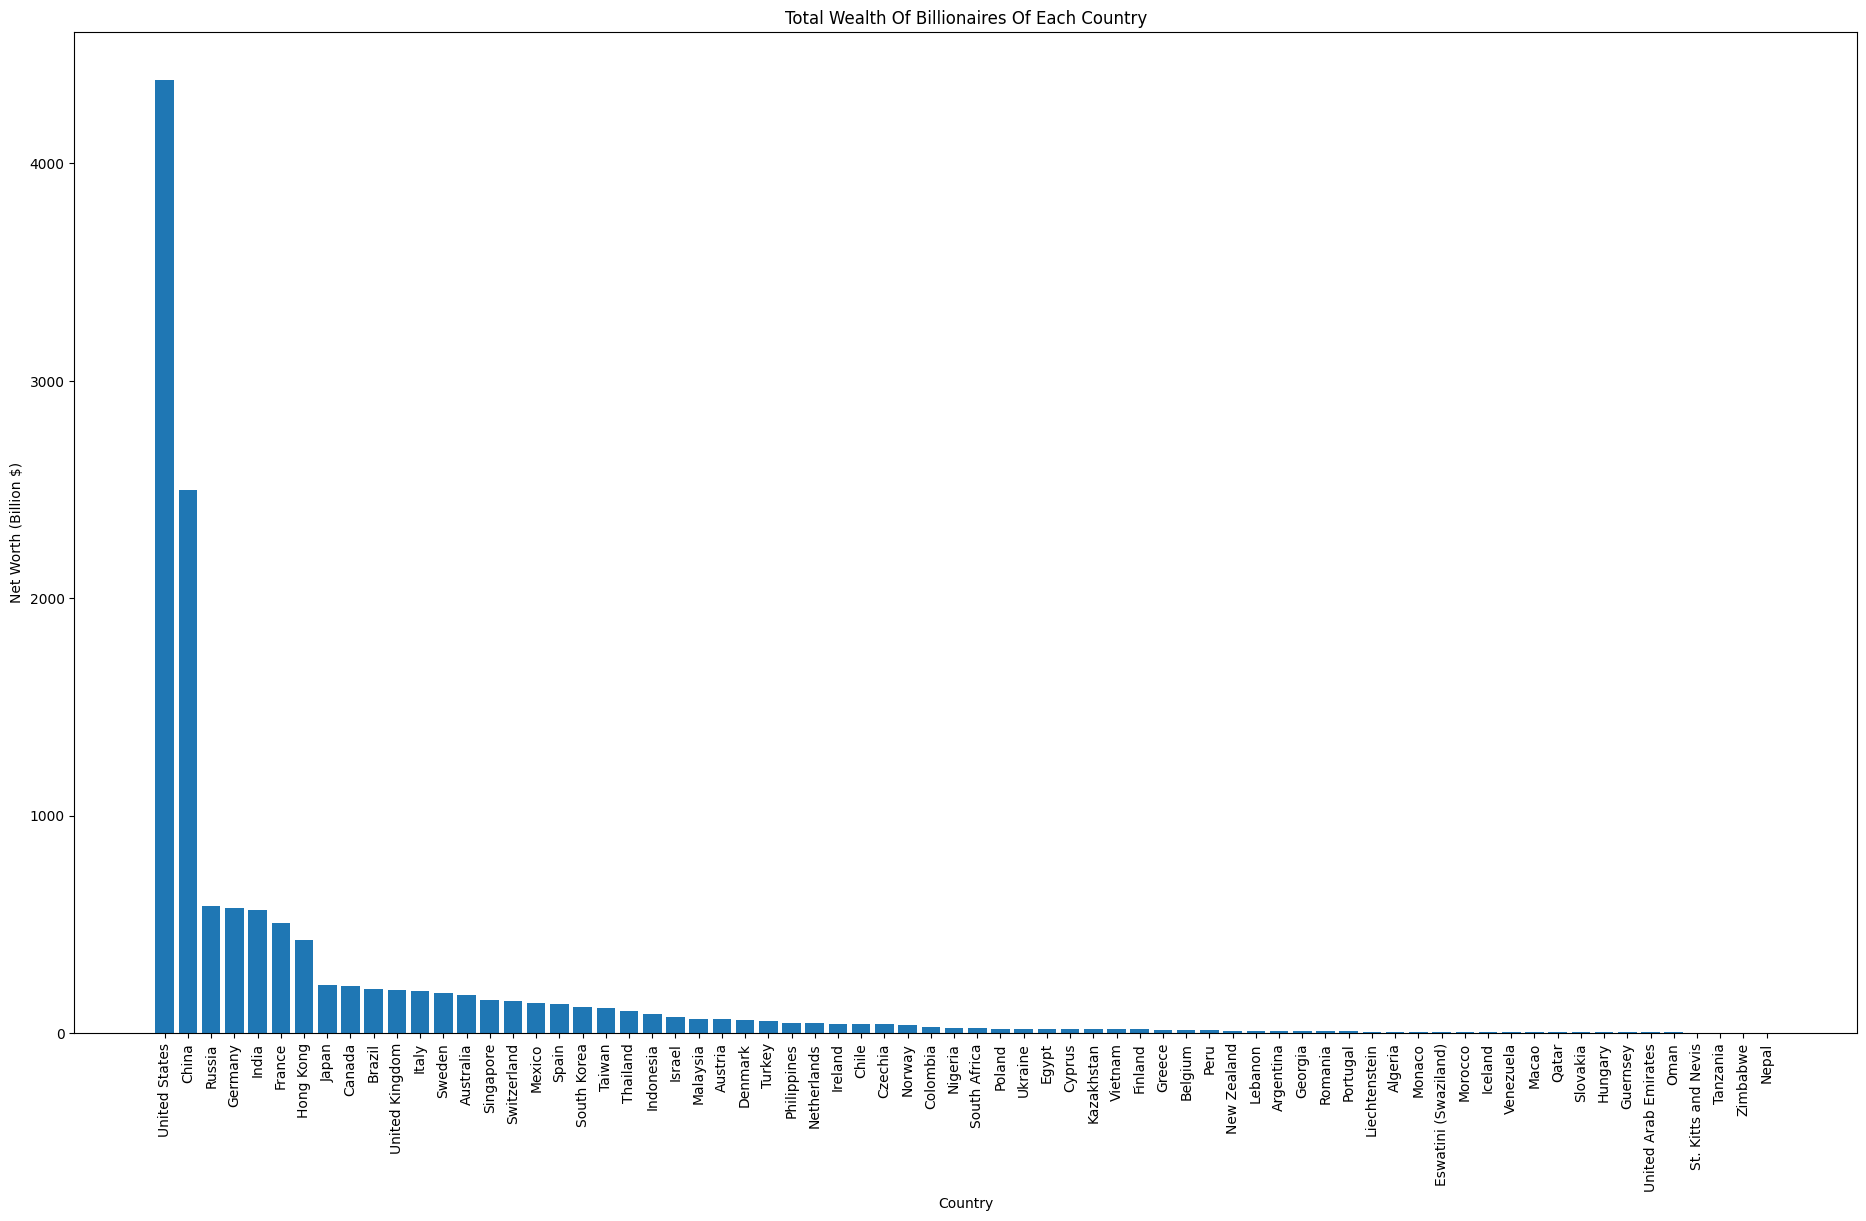

In [9]:
plt.figure(figsize=(23, 13))
plt.bar(df["Country"], df["NetWorth"])
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Net Worth (Billion $)")
plt.title("Total Wealth Of Billionaires Of Each Country")
plt.show()

 : ده فرد اول ثروتمند آمریکایی

In [11]:
df_10top_En=data.query("Country=='United States'").sort_values(by="NetWorth",ascending=False).head(10).reset_index(drop=True)
df_10top_En

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
3,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
4,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
5,Larry Ellison,93.0,United States,software,7,76.0,Technology
6,Larry Page,91.5,United States,Google,8,48.0,Technology
7,Sergey Brin,89.0,United States,Google,9,47.0,Technology
8,Steve Ballmer,68.7,United States,Microsoft,14,65.0,Technology
9,Alice Walton,61.8,United States,Walmart,17,71.0,Fashion & Retail


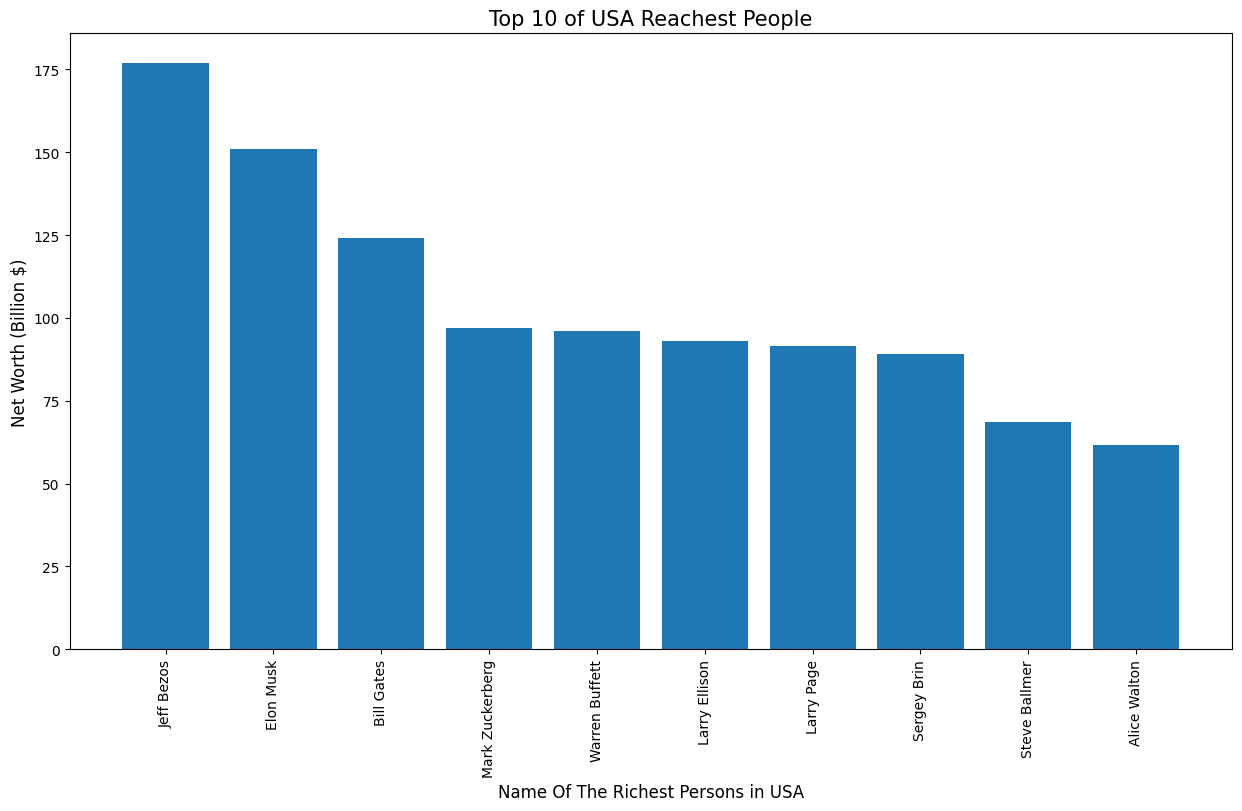

In [12]:
plt.figure(figsize=(15, 8))
df=data.query('Country=="United States"').reset_index()
plt.title('Top 10 of USA Reachest People', fontsize=15)
df=df.head(10)
plt.bar(df['Name'],df['NetWorth'])
plt.xticks(rotation=90)
plt.ylabel("Net Worth (Billion $)", fontsize=12)
plt.xlabel("Name Of The Richest Persons in USA", fontsize=12)
plt.show()



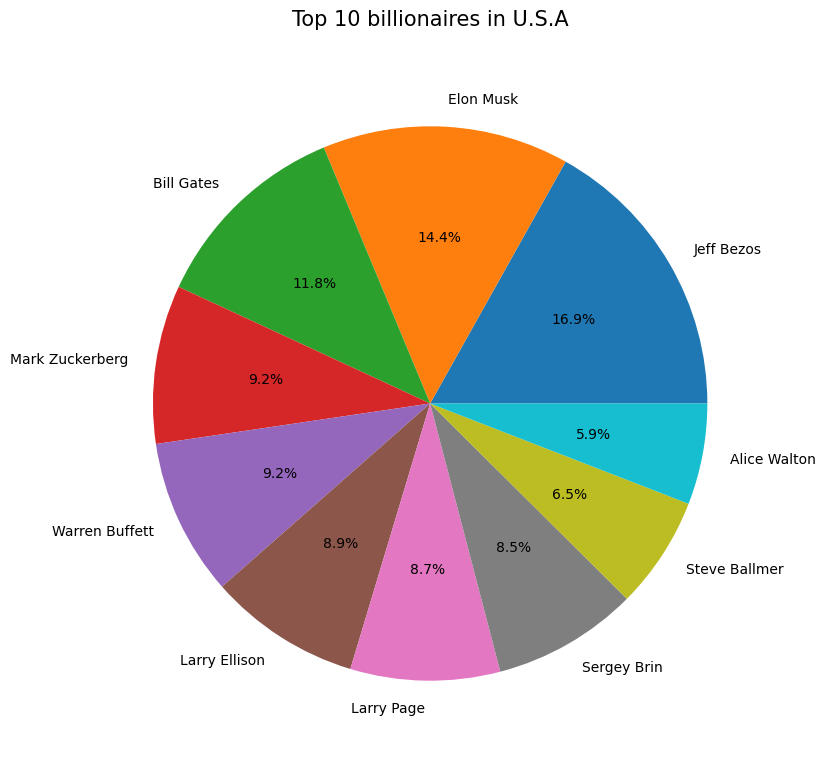

In [13]:
plt.figure(figsize=(18,9))
plt.pie(df_10top_En["NetWorth"],labels=df_10top_En["Name"],autopct="%1.1f%%")
plt.title("Top 10 billionaires in U.S.A\n", fontsize=15)
plt.show()

 : ده کشوری که کمترین تعداد ثروتمند در جهان دارند را به همراه تعداد ثروتمندان آن ها بر روی نمودار نمایش دهید

In [14]:
df = data['Country'].value_counts().reset_index()
df = df.sort_values(by=['count']).head(10).reset_index(drop=True)
df

,Country,count
0,Nepal,1
1,Zimbabwe,1
2,St. Kitts and Nevis,1
3,Tanzania,1
4,Guernsey,1
5,Oman,1
6,Liechtenstein,1
7,Macao,1
8,Venezuela,1
9,Eswatini (Swaziland),1


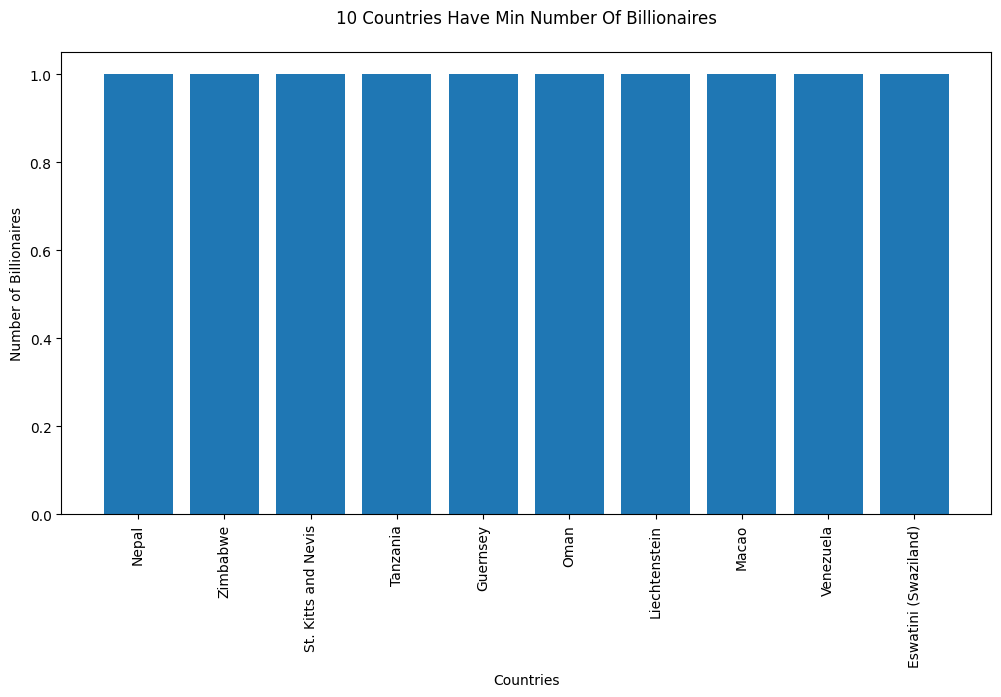

In [15]:
df=data['Country'].value_counts().reset_index()
df=df.sort_values(by="count",ascending=True)
df=df.head(10)
plt.figure(figsize=(12,6))
plt.bar(df['Country'],df['count'])
plt.xticks(rotation=90)
plt.title("10 Countries Have Min Number Of Billionaires\n")
plt.xlabel("Countries")
plt.ylabel("Number of Billionaires")
plt.show()

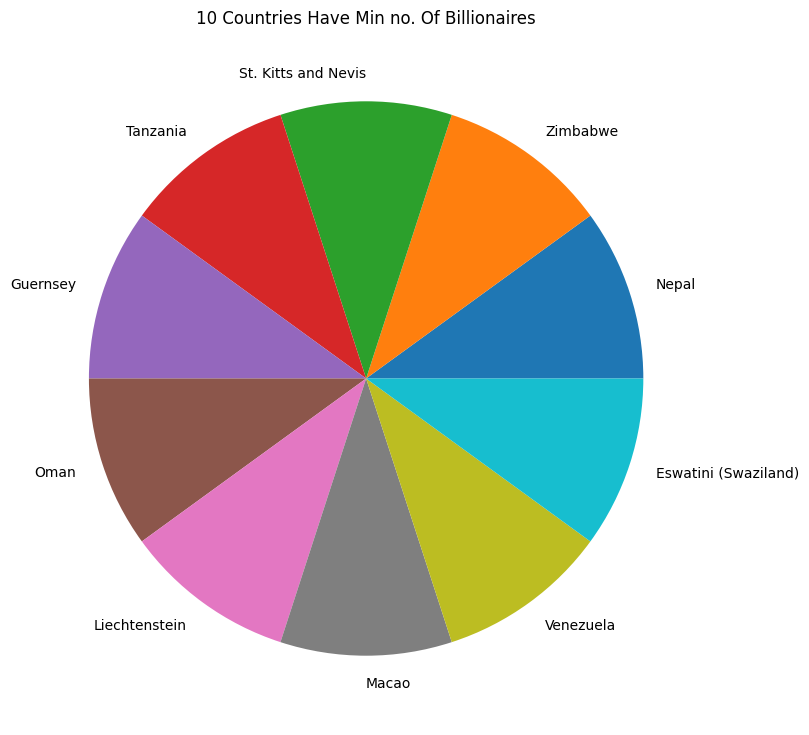

In [16]:
plt.figure(figsize=(18,9))
plt.pie(df['count'], labels = df['Country'])
plt.title('10 Countries Have Min no. Of Billionaires')
plt.show()